In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load the CSV file
df = pd.read_csv("/content/imdb.csv", engine='python', on_bad_lines='skip')

In [8]:
# Basic info
print("Dataset Shape:", df.shape)
print("\nDataset Head:")
display(df.head())

Dataset Shape: (22150, 2)

Dataset Head:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 review       0
sentiment    0
dtype: int64


In [10]:
# Class distribution
print("\nSentiment Distribution:\n", df['sentiment'].value_counts())


Sentiment Distribution:
 sentiment
negative    11137
positive    11013
Name: count, dtype: int64


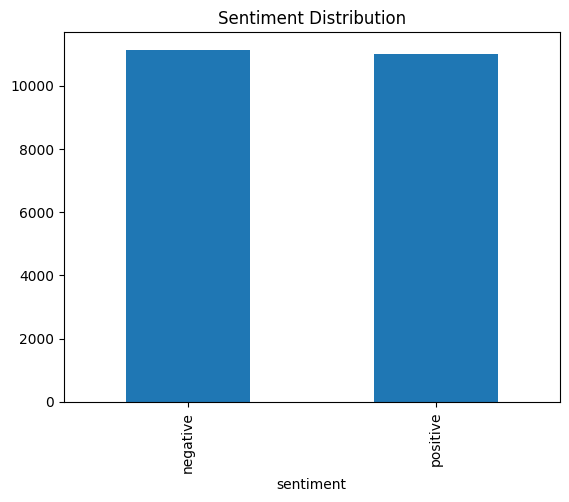

In [11]:
# Plot class distribution
df['sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")
plt.show()


Review Length Stats:
 count    22150.000000
mean       231.332190
std        171.970301
min          8.000000
25%        126.000000
50%        172.000000
75%        281.000000
max       1839.000000
Name: review_length, dtype: float64


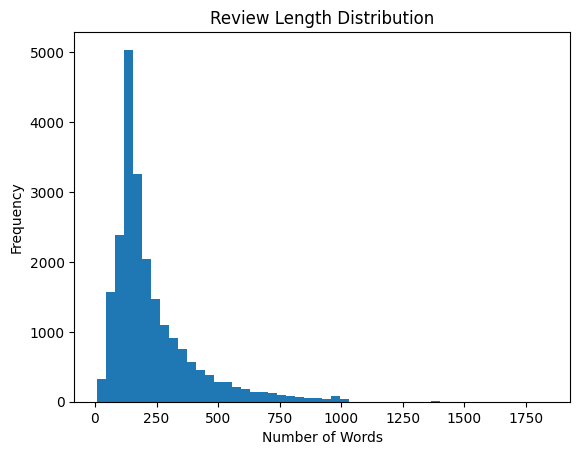

In [14]:
# Review length analysis
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
print("\nReview Length Stats:\n", df['review_length'].describe())

plt.hist(df['review_length'], bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

## Preprocessing for LSTM

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])  # 0 = negative, 1 = positive

# Tokenization
MAX_WORDS = 10000
MAX_LEN = 200

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])

X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=MAX_LEN, padding='post', truncating='post')
y = df['sentiment'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: Simple LSTM

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model1 = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=64, input_length=MAX_LEN),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.5072 - loss: 0.6925 - val_accuracy: 0.5511 - val_loss: 0.6895
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.5629 - loss: 0.6781 - val_accuracy: 0.5878 - val_loss: 0.6546
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.6177 - loss: 0.6133 - val_accuracy: 0.6055 - val_loss: 0.6476
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.6922 - loss: 0.5505 - val_accuracy: 0.6411 - val_loss: 0.6440
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.6862 - loss: 0.5659 - val_accuracy: 0.6013 - val_loss: 0.6472
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.7381 - loss: 0.4763 - val_accuracy: 0.7856 - val_loss: 0.5064
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.8703 - loss: 0.3370 - val_accuracy: 0.7901 - val_loss: 0.4683
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.9187 - loss: 0.2187 - 

## Model 2: Bidirectional LSTM + Dropout

In [21]:
from tensorflow.keras.layers import Bidirectional

model2 = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.6184 - loss: 0.6385 - val_accuracy: 0.8194 - val_loss: 0.4200
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.8688 - loss: 0.3329 - val_accuracy: 0.8473 - val_loss: 0.3752
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.9278 - loss: 0.2041 - val_accuracy: 0.8428 - val_loss: 0.4469
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.9423 - loss: 0.1599 - val_accuracy: 0.8211 - val_loss: 0.4818
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.9366 - loss: 0.1863 - val_accuracy: 0.8378 - val_loss: 0.4996
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.9675 - loss: 0.0996 - val_accuracy: 0.8290 - val_loss: 0.6293
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.9796 - loss: 0.0654 - val_accuracy: 0.8200 - val_loss: 0.6534
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.9798 - loss: 0.0654 - 

## Compare Model Performance

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict on test data
y_pred1 = (model1.predict(X_test) > 0.5).astype("int32")
y_pred2 = (model2.predict(X_test) > 0.5).astype("int32")

# Model 1 evaluation
print(" Model 1 Evaluation")
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1, target_names=['Negative', 'Positive']))

# Model 2 evaluation
print("\n Model 2 Evaluation")
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2, target_names=['Negative', 'Positive']))


139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
 Model 1 Evaluation
[[1848  379]
 [ 311 1892]]
              precision    recall  f1-score   support

    Negative       0.86      0.83      0.84      2227
    Positive       0.83      0.86      0.85      2203

    accuracy                           0.84      4430
   macro avg       0.84      0.84      0.84      4430
weighted avg       0.84      0.84      0.84      4430


 Model 2 Evaluation
[[1861  366]
 [ 439 1764]]
              precision    recall  f1-score   support

    Negative       0.81      0.84      0.82      2227
    Positive       0.83      0.80      0.81      2203

    accuracy                           0.82      4430
   macro avg       0.82      0.82      0.82      4430
weighted avg       0.82      0.82      0.82      4430



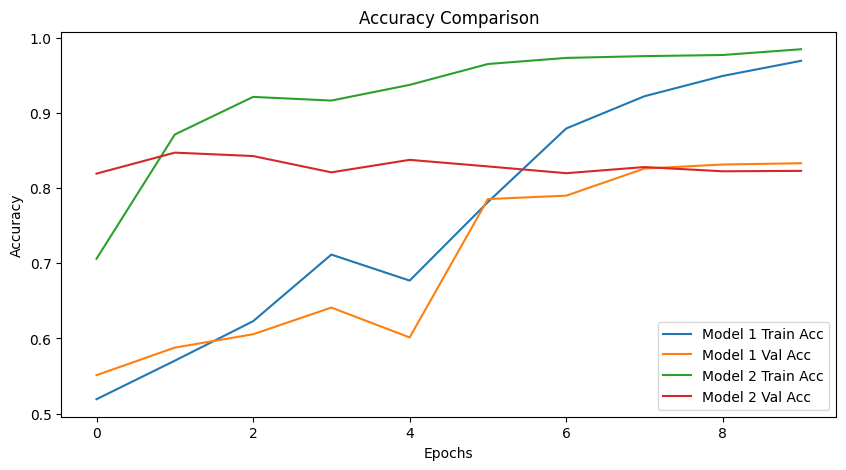

Model 1 Test Accuracy: 0.8442
Model 2 Test Accuracy: 0.8183


In [23]:
import matplotlib.pyplot as plt

def plot_history(history, label):
    plt.plot(history.history['accuracy'], label=f'{label} Train Acc')
    plt.plot(history.history['val_accuracy'], label=f'{label} Val Acc')

plt.figure(figsize=(10, 5))
plot_history(history1, "Model 1")
plot_history(history2, "Model 2")
plt.title("Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Evaluate on Test Data
test_loss1, test_acc1 = model1.evaluate(X_test, y_test, verbose=0)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test, verbose=0)

print(f"Model 1 Test Accuracy: {test_acc1:.4f}")
print(f"Model 2 Test Accuracy: {test_acc2:.4f}")

In [26]:
model1.save("simple_lstm_model.h5")
model2.save("bilstm_dropout_model.h5")